In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [7]:
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.665625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.62      0.72      0.67       132
           7       0.68      0.50      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import joblib
joblib.dump(model, "wine_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [9]:
def predict_wine_quality(model, scaler, user_input):
    """
    user_input: dict with keys same as dataset features
    Example:
    {
        'fixed acidity': 7.4,
        'volatile acidity': 0.7,
        'citric acid': 0.0,
        'residual sugar': 1.9,
        'chlorides': 0.076,
        'free sulfur dioxide': 11,
        'total sulfur dioxide': 34,
        'density': 0.9978,
        'pH': 3.51,
        'sulphates': 0.56,
        'alcohol': 9.4
    }
    """
    # Convert dict to DataFrame
    df_input = pd.DataFrame([user_input])
    # Scale
    df_input_scaled = scaler.transform(df_input)
    # Predict
    pred = model.predict(df_input_scaled)
    return pred[0]


In [10]:
sample_input = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.7,
    'citric acid': 0.0,
    'residual sugar': 1.9,
    'chlorides': 0.076,
    'free sulfur dioxide': 11,
    'total sulfur dioxide': 34,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

predicted_quality = predict_wine_quality(model, scaler, sample_input)
print("Predicted Wine Quality:", predicted_quality)


Predicted Wine Quality: 5


In [11]:
print("Enter wine characteristics to predict quality:")

user_input = {}
for col in X.columns:
    value = float(input(f"{col}: "))
    user_input[col] = value

predicted_quality = predict_wine_quality(model, scaler, user_input)
print("\nPredicted Wine Quality:", predicted_quality)


Enter wine characteristics to predict quality:
fixed acidity: 7.4
volatile acidity: 0.7
citric acid: 0.0
residual sugar: 1.9
chlorides: 0.076
free sulfur dioxide: 11
total sulfur dioxide: 34
density: 0.9978
pH: 3.51
sulphates: 0.56
alcohol: 9.4

Predicted Wine Quality: 5


In [12]:
#now we start eda process
# 1️⃣ Check dataset info
print("Dataset info:")
print(df.info())
print("\nDataset description:")
print(df.describe())

# 2️⃣ Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Dataset description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.

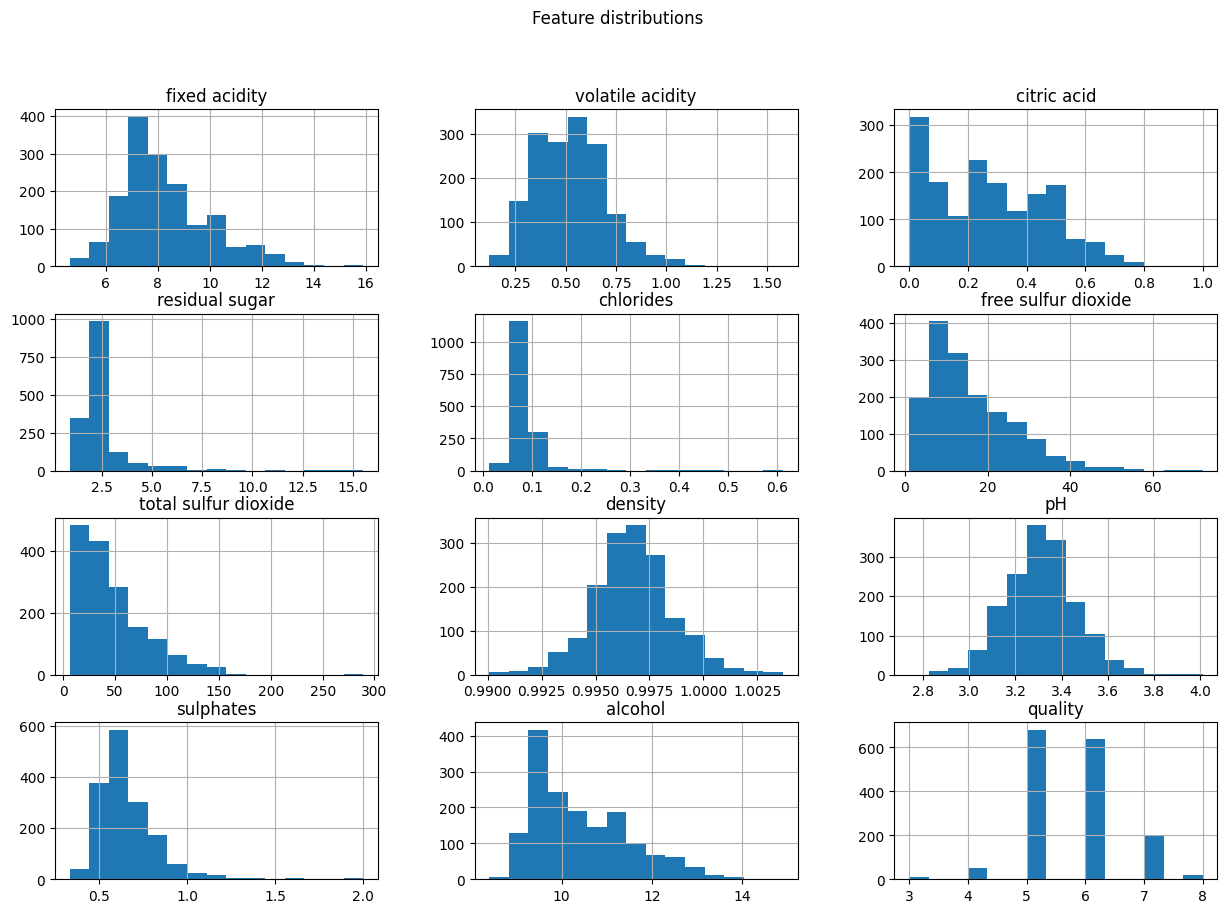

In [13]:
# 3️⃣ Plot histogram for each feature
df.hist(bins=15, figsize=(15,10), layout=(4,3))
plt.suptitle("Feature distributions")
plt.show()


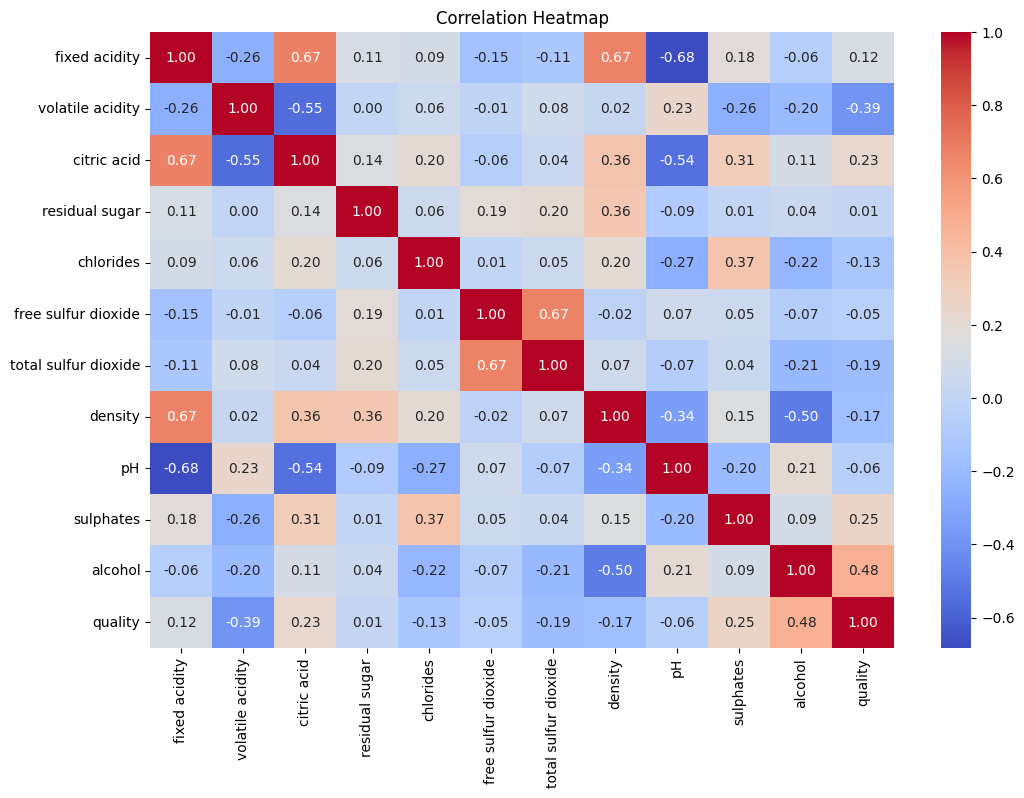

In [14]:
# 4️⃣ Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


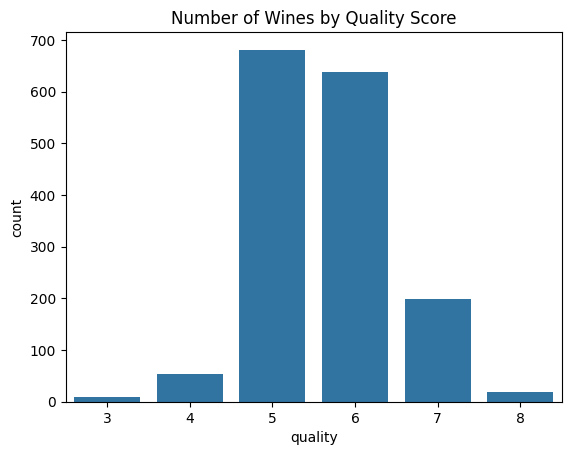

In [15]:
# 5️⃣ Count of each quality score
sns.countplot(x="quality", data=df)
plt.title("Number of Wines by Quality Score")
plt.show()


In [16]:
!pip install streamlit --quiet
!pip install pyngrok --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.6 MB/s eta 0:00:00


In [17]:
# 1️⃣ Import libraries
import streamlit as st
import joblib
from pyngrok import ngrok
import pandas as pd


In [18]:
# 2️⃣ Load model and scaler
model = joblib.load("wine_model.pkl")
scaler = joblib.load("scaler.pkl")

features = X.columns.tolist()



In [28]:
import pandas as pd
import joblib

# Load the saved model and scaler
model = joblib.load("wine_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example wine input
sample_input = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.7,
    'citric acid': 0.0,
    'residual sugar': 1.9,
    'chlorides': 0.076,
    'free sulfur dioxide': 11,
    'total sulfur dioxide': 34,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

# Convert to DataFrame
df_input = pd.DataFrame([sample_input])

# Scale features
df_scaled = scaler.transform(df_input)

# Predict
prediction = model.predict(df_scaled)[0]
print("Predicted Wine Quality:", prediction)


Predicted Wine Quality: 5


In [29]:
# Install ipywidgets
!pip install ipywidgets --quiet
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load("wine_model.pkl")
scaler = joblib.load("scaler.pkl")

# Create widgets for input features
fixed_acidity = widgets.FloatSlider(min=4, max=16, step=0.1, value=7.4, description='Fixed Acidity')
volatile_acidity = widgets.FloatSlider(min=0, max=1.5, step=0.01, value=0.7, description='Volatile Acidity')
citric_acid = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.0, description='Citric Acid')
residual_sugar = widgets.FloatSlider(min=0, max=15, step=0.1, value=1.9, description='Residual Sugar')
chlorides = widgets.FloatSlider(min=0, max=0.2, step=0.001, value=0.076, description='Chlorides')
free_sulfur_dioxide = widgets.IntSlider(min=0, max=72, step=1, value=11, description='Free SO2')
total_sulfur_dioxide = widgets.IntSlider(min=0, max=289, step=1, value=34, description='Total SO2')
density = widgets.FloatSlider(min=0.990, max=1.004, step=0.0001, value=0.9978, description='Density')
pH = widgets.FloatSlider(min=2.7, max=4.0, step=0.01, value=3.51, description='pH')
sulphates = widgets.FloatSlider(min=0.3, max=2.0, step=0.01, value=0.56, description='Sulphates')
alcohol = widgets.FloatSlider(min=8.0, max=14.0, step=0.1, value=9.4, description='Alcohol')

# Display widgets
ui = widgets.VBox([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                   free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol])
display(ui)

# Predict button
button = widgets.Button(description="Predict Wine Quality 🍷", button_style='success')
output = widgets.Output()
display(button, output)

def on_button_clicked(b):
    sample_input = {
        'fixed acidity': fixed_acidity.value,
        'volatile acidity': volatile_acidity.value,
        'citric acid': citric_acid.value,
        'residual sugar': residual_sugar.value,
        'chlorides': chlorides.value,
        'free sulfur dioxide': free_sulfur_dioxide.value,
        'total sulfur dioxide': total_sulfur_dioxide.value,
        'density': density.value,
        'pH': pH.value,
        'sulphates': sulphates.value,
        'alcohol': alcohol.value
    }
    df_input = pd.DataFrame([sample_input])
    df_scaled = scaler.transform(df_input)
    prediction = model.predict(df_scaled)[0]

    with output:
        outp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00


Button(button_style='success', description='Predict Wine Quality 🍷', style=ButtonStyle())

Output()

In [32]:
# Install ipywidgets (if not already)
!pip install ipywidgets --quiet

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from IPython.display import display
import ipywidgets as widgets

# ----------------------------
# Step 1: Load dataset
# ----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# ----------------------------
# Step 2: Split features & target
# ----------------------------
X = df.drop("quality", axis=1)
y = df["quality"]

# ----------------------------
# Step 3: Train/test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Step 4: Scale features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# Step 5: Train model
# ----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
preds = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

# ----------------------------
# Step 6: Save model and scaler
# ----------------------------
joblib.dump(model, "wine_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Load them (just to simulate real project workflow)
model = joblib.load("wine_model.pkl")
scaler = joblib.load("scaler.pkl")

# ----------------------------
# Step 7: Create interactive UI
# ----------------------------
# Create sliders for each feature
fixed_acidity = widgets.FloatSlider(min=4, max=16, step=0.1, value=7.4, description='Fixed Acidity')
volatile_acidity = widgets.FloatSlider(min=0, max=1.5, step=0.01, value=0.7, description='Volatile Acidity')
citric_acid = widgets.FloatSlider(min=0, max=1.0, step=0.01, value=0.0, description='Citric Acid')
residual_sugar = widgets.FloatSlider(min=0, max=15, step=0.1, value=1.9, description='Residual Sugar')
chlorides = widgets.FloatSlider(min=0, max=0.2, step=0.001, value=0.076, description='Chlorides')
free_sulfur_dioxide = widgets.IntSlider(min=0, max=72, step=1, value=11, description='Free SO2')
total_sulfur_dioxide = widgets.IntSlider(min=0, max=289, step=1, value=34, description='Total SO2')
density = widgets.FloatSlider(min=0.990, max=1.004, step=0.0001, value=0.9978, description='Density')
pH = widgets.FloatSlider(min=2.7, max=4.0, step=0.01, value=3.51, description='pH')
sulphates = widgets.FloatSlider(min=0.3, max=2.0, step=0.01, value=0.56, description='Sulphates')
alcohol = widgets.FloatSlider(min=8.0, max=14.0, step=0.1, value=9.4, description='Alcohol')

ui = widgets.VBox([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                   free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol])
display(ui)

# Predict button
button = widgets.Button(description="Predict Wine Quality 🍷", button_style='success')
output = widgets.Output()
display(button, output)

def on_button_clicked(b):
    sample_input = {
        'fixed acidity': fixed_acidity.value,
        'volatile acidity': volatile_acidity.value,
        'citric acid': citric_acid.value,
        'residual sugar': residual_sugar.value,
        'chlorides': chlorides.value,
        'free sulfur dioxide': free_sulfur_dioxide.value,
        'total sulfur dioxide': total_sulfur_dioxide.value,
        'density': density.value,
        'pH': pH.value,
        'sulphates': sulphates.value,
        'alcohol': alcohol.value
    }
    df_input = pd.DataFrame([sample_input])
    df_scaled = scaler.transform(df_input)
    prediction = model.predict(df_scaled)[0]

    with output:
        output.clear_output()
        print(f"Predicted Wine Quality: {prediction}")

button.on_click(on_button_clicked)


Accuracy: 0.659375

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Button(button_style='success', description='Predict Wine Quality 🍷', style=ButtonStyle())

Output()

In [33]:
import pandas as pd

# Example wines — each row is a wine
example_wines = pd.DataFrame({
    'fixed acidity': [7.4, 7.8, 7.9],
    'volatile acidity': [0.7, 0.88, 0.6],
    'citric acid': [0.0, 0.0, 0.06],
    'residual sugar': [1.9, 2.6, 1.8],
    'chlorides': [0.076, 0.098, 0.092],
    'free sulfur dioxide': [11, 25, 15],
    'total sulfur dioxide': [34, 67, 54],
    'density': [0.9978, 0.9968, 0.997],
    'pH': [3.51, 3.20, 3.26],
    'sulphates': [0.56, 0.68, 0.65],
    'alcohol': [9.4, 9.8, 10.5]
})

example_wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
2,7.9,0.60,0.06,1.8,0.092,15,54,0.9970,3.26,0.65,10.5


In [34]:
import ipywidgets as widgets
from IPython.display import display

# Create sliders for each feature and each example wine
sliders = []

for col in example_wines.columns:
    slider = widgets.FloatRangeSlider(
        value=[example_wines[col].min(), example_wines[col].max()],
        min=example_wines[col].min(),
        max=example_wines[col].max(),
        step=0.01,
        description=col,
        continuous_update=False,
        layout=widgets.Layout(width='90%')
    )
    sliders.append(slider)

ui = widgets.VBox(sliders)
display(ui)


In [35]:
button = widgets.Button(description="Predict All Wines 🍷", button_style='success')
output = widgets.Output()
display(button, output)

def on_button_clicked(b):
    # Create DataFrame from slider values
    input_data = pd.DataFrame({
        col: [slider.value[0] for slider in sliders]  # Take min as example
        for col, slider in zip(example_wines.columns, sliders)
    })

    # Scale and predict
    df_scaled = scaler.transform(input_data)
    predictions = model.predict(df_scaled)

    with output:
        output.clear_output()
        result = input_data.copy()
        result['Predicted Quality'] = predictions
        display(result)

button.on_click(on_button_clicked)


Button(button_style='success', description='Predict All Wines 🍷', style=ButtonStyle())

Output()